## Abalone Dataset

### Preprocessing

##### Loading Data

In [28]:
#Columns/Features
D = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']
L = 'Rings'
DL = D + [L]

#Loading Data set
abalone = pd.read_csv("abalone.csv", sep=',', names=DL)

abalone = abalone.replace('M', 0)
abalone = abalone.replace('F', 1)
abalone = abalone.replace('I', 2)

##### Normalization/Scaling

In [29]:
abalone1=abalone.copy()
abalone_z = abalone1.drop(columns = ['Sex', 'Rings'])
abalone_znormalized = abalone_z.apply(stats.zscore)
abalone_znormalized['Sex'] = abalone['Sex']
abalone_znormalized['Rings'] = abalone['Rings']

target_z = abalone_znormalized['Rings']
data_z = abalone_znormalized.drop(columns = 'Rings')
X_train_z, X_test_z, Y_train_z, Y_test_z = train_test_split(data_z, target_z, test_size=0.2 , random_state=27)

In [30]:
abalone_s = abalone.copy()
abalone_s = abalone_s.drop(columns = ['Sex' , 'Rings'])
abalone_minmax = (abalone_s - abalone_s.min()) / ( abalone_s.max() - abalone_s.min())
abalone_minmax['Sex'] = abalone['Sex']
abalone_minmax['Rings'] = abalone['Rings']

abalone_min_max = abalone_minmax
target = abalone_min_max['Rings']
data = abalone_min_max.drop(columns = 'Rings')
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.2 , random_state=27)

##### Best formulated KNN from Assignment-1

In [31]:
knn = KNeighborsClassifier(n_neighbors=66, metric='minkowski', weights='uniform', p=2)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

knn_train_acc = knn.score(X_train, Y_train)
print("Training Score: ", knn_train_acc)
knn_test_acc = knn.score(X_test, Y_test)
print("Testing Score: ", knn_test_acc)

Training Score:  0.2975157138581263
Testing Score:  0.2631578947368421


### Representation Learning

##### Indepepndent and dependent variable

In [32]:
#Scaled 'data' and 'target'
x=data
y=target
n_components=2
target_names = np.sort(y.unique())

#### PCA

PCA Model - Explained Variance of each component
   Explained Variance Ratio
0                  0.865084
1                  0.123693


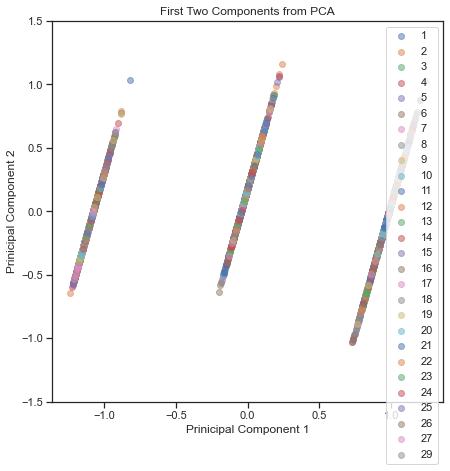

In [33]:
print("PCA Model - Explained Variance of each component")
pca = PCA(n_components=n_components)
X_r = pca.fit(x).transform(x)
exp_var_ratio_df = pd.DataFrame(pca.explained_variance_ratio_, columns=['Explained Variance Ratio'])
print(exp_var_ratio_df)

plt.figure(figsize=(7,7))
colors = plt.cm.get_cmap("twilight")

for i, target_name in enumerate(target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], alpha=0.5, lw=1, label=target_name, cmap="twilight"
    )
plt.ylim(-1.5,1.5)
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("Prinicipal Component 1")
plt.ylabel("Prinicipal Component 2")
plt.title("First Two Components from PCA")
plt.set_cmap("twilight")

plt.show()

#### LDA

LDA Model - Explained Variance of each component
   Explained Variance Ratio
0                  0.719139
1                  0.216991


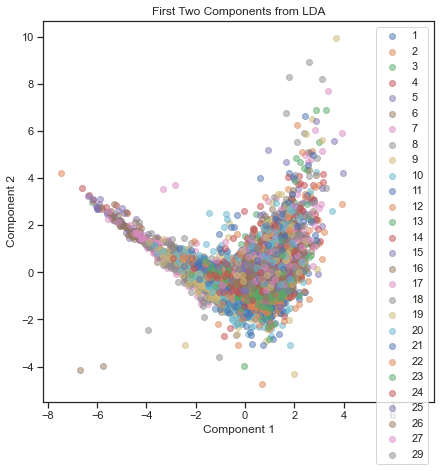

In [34]:
print("LDA Model - Explained Variance of each component")
lda = LinearDiscriminantAnalysis(n_components=n_components)
X_r2 = lda.fit(x, y).transform(x)
exp_var_ratio_df = pd.DataFrame(lda.explained_variance_ratio_, columns=['Explained Variance Ratio'])
print(exp_var_ratio_df)

plt.figure(figsize=(7,7))
colors = plt.cm.get_cmap("twilight")
for i, target_name in enumerate(target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.5, lw=1, label=target_name, cmap="twilight"
    )
#plt.xlim(-4,4)
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("First Two Components from LDA")
plt.set_cmap("twilight")

plt.show()

#### T-SNE

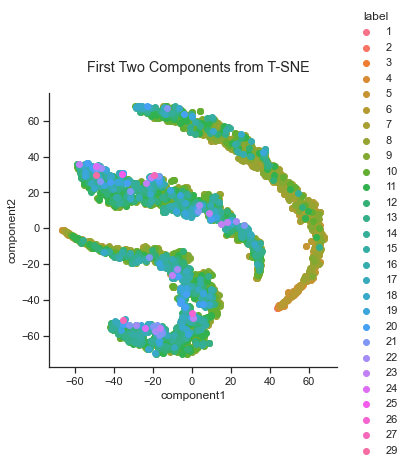

In [35]:
tsne = TSNE(n_components=n_components)
X_r3 = tsne.fit_transform(x)
tsne_data = np.vstack((X_r3.T,target)).T
tsne_df = pd.DataFrame(data = tsne_data, columns = ['component1', 'component2','label'] )
#print(tsne_df.head())
tsne_df['label'] = tsne_df['label'].astype('int')
tsne_df['label'] = tsne_df['label'].astype('category')
g = sns.FacetGrid(tsne_df, hue='label', height=5).map(plt.scatter, 'component1','component2')
g.add_legend()
g.fig.suptitle("First Two Components from T-SNE ")
g.tight_layout()

#### Comments

- PCA: Three distant lines due to presence of categorical column(Sex) in the data.We have one principal component that explains nearly all (85%) of the variance the reason is, the principal component is a mixture of all variables in nearly equal proportions. That is, the principal component is the one that combines every single variable.
- LDA: Inter Class spread is increased and intra-class spread is decreased, clusterring similar class points together. Outliers evident in the plot asdistance between them is large.
- t-SNE: Keeps changing with the run, three clusters are formed, better way to visualize but doe not help in our case for multiclass classification

#### Scree Plot (PCA)

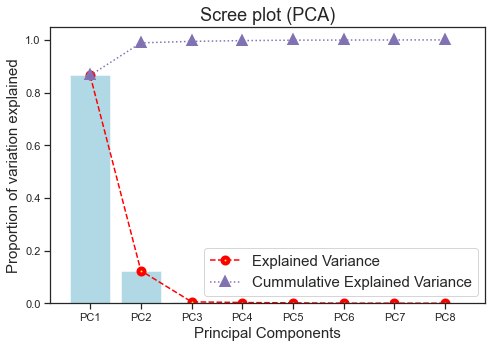

In [36]:
pca = PCA(n_components=None)
X_r = pca.fit(x).transform(x)
explained_variance_pca = pca.explained_variance_ratio_
fig = plt.figure(figsize=(7,5))
tick_label = ['PC' + str(i) for i in range(1,len(explained_variance_pca)+1)]
plt.bar(range(len(explained_variance_pca)), explained_variance_pca, color = 'c',alpha=0.5, align='center',tick_label=tick_label)
plt.plot(range(len(explained_variance_pca)), explained_variance_pca, color = 'red',marker ='o',mew =4,mfc='yellow',ls ='--' ,linewidth=1.5,label='Explained Variance')
plt.plot(range(len(explained_variance_pca)), explained_variance_pca.cumsum(), color = 'm',marker ='^',mew =4,mfc='red',ls =':' ,linewidth=1.5,label='Cummulative Explained Variance')
plt.ylabel('Proportion of variation explained',fontsize = 15)
plt.xlabel('Principal Components',fontsize = 15)
plt.title('Scree plot (PCA)',fontsize = 18)
plt.legend(loc='best',fontsize = 15)
#plt.axis("off")
plt.tight_layout()
plt.show()

#### Reduced Dimensionality

##### PCA

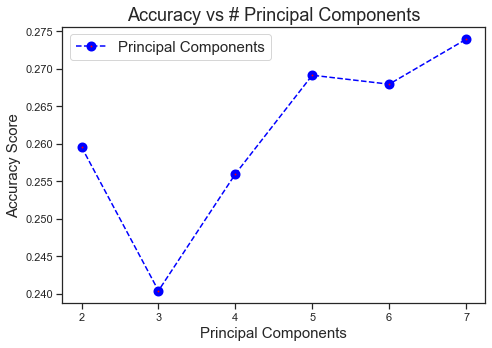

The maximum accuracy 0.27392344497607657 happens to be when number of Principal Components is : 7


In [37]:
knn = KNeighborsClassifier(n_neighbors=66, metric='minkowski', weights='uniform', p=2)
D = data.shape[1]
#print(D)
acc_list =[]

for i in range(2,D):
    pca = PCA(n_components=i)
    X_train_r = pca.fit(X_train).transform(X_train)
    X_test_r = pca.transform(X_test)
    knn.fit(X_train_r, Y_train)
    y_pred = knn.predict(X_test_r)
    acc_list.append(metrics.accuracy_score(Y_test,y_pred))

fig = plt.figure(figsize=(7,5))
plt.plot(range(2,D),acc_list, color = 'blue',marker ='o',mew =4,mfc='red',ls ='--' ,linewidth=1.5,label='Principal Components')
plt.ylabel('Accuracy Score',fontsize = 15)
plt.xlabel('Principal Components',fontsize = 15)
plt.title('Accuracy vs # Principal Components',fontsize = 18)
plt.legend(loc='best',fontsize = 15)
plt.tight_layout()
plt.show()

print("The maximum accuracy {} happens to be when number of Principal Components is : {}".format(max(acc_list),acc_list.index(max(acc_list))+2))

##### LDA

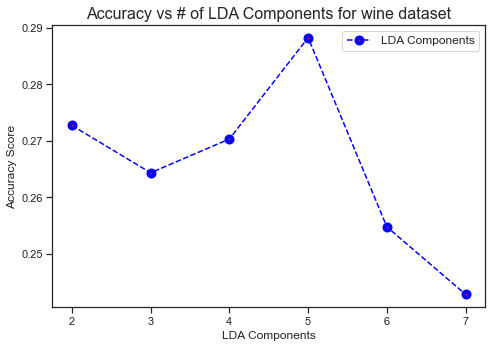

The maximum accuracy 0.28827751196172247 happens to be when number of LDA Components is : 5


In [38]:
knn = KNeighborsClassifier(n_neighbors=66, metric='minkowski', weights='uniform', p=2)
#LDA is constrained by the number of components it can use , given by : min(n_classes-1, len(features))
D = min(data.shape[1],len(target_names))
acc_list =[]

for i in range(2,D):
    lda = LinearDiscriminantAnalysis(n_components=i)
    X_train_r = lda.fit(X_train,Y_train).transform(X_train)
    X_test_r = lda.transform(X_test)
    knn.fit(X_train_r, Y_train)
    y_pred = knn.predict(X_test_r)
    acc_list.append(metrics.accuracy_score(Y_test,y_pred))

fig = plt.figure(figsize=(7,5))
plt.plot(range(2,D),acc_list, color = 'blue',marker ='o',mew =4,mfc='red',ls ='--' ,linewidth=1.5,label='LDA Components')
plt.ylabel('Accuracy Score',fontsize = 12)
plt.xlabel('LDA Components',fontsize = 12)
plt.title('Accuracy vs # of LDA Components for wine dataset',fontsize = 16)
plt.legend(loc='best',fontsize = 12)
plt.tight_layout()
plt.show()

print("The maximum accuracy {} happens to be when number of LDA Components is : {}".format(max(acc_list),acc_list.index(max(acc_list))+2))

#### Comments

- Two Principal Components are able to explain 98% of the variance in the dataset. We get maximum accuracy with 7 principal components which is same as orginal dimension of dataset, but we use 5 components in subsequent sections as there is no significant difference in accuracy with 5 and 7 components.
- With 5 components in LDA, we get maximum accuracy (more than PCA). LDA does a better job at classification task.
- Dimensionality Reduction improves the accuracy for both PCA and LDA compared to best formulation from Assignment-1

#### Versions of dataset (raw/pca/lda)

In [39]:
abalone_raw = abalone.copy()
abalone_normalized_raw = abalone_znormalized.copy()
abalone_minmax_normalized = abalone_minmax.copy()

pca = PCA(n_components=5)
X_r = pca.fit(x).transform(x)
pca_data = np.vstack((X_r.T,target)).T
abalone_pca = pd.DataFrame(data = pca_data, columns = ['component1','component2','component3', 'component4','component5','label'] )
abalone_temp_pca = abalone_pca.copy()
abalone_temp_pca_2 = abalone_temp_pca.drop(columns = ['label'])
abalone_pca = (abalone_temp_pca_2 - abalone_temp_pca_2.min()) / ( abalone_temp_pca_2.max() - abalone_temp_pca_2.min())
abalone_pca['label'] = abalone_temp_pca['label']
#abalone_pca = (abalone_pca - abalone_pca.min()) / ( abalone_pca.max() - abalone_pca.min())
abalone_pca['label'] = abalone_pca['label'].astype('int')
abalone_pca['label'] = abalone_pca['label'].astype('category')
#print(abalone_pca.head())

lda = LinearDiscriminantAnalysis(n_components=5)
X_r2 = lda.fit(x, y).transform(x)
lda_data = np.vstack((X_r2.T,target)).T
abalone_lda = pd.DataFrame(data = lda_data, columns = ['component1', 'component2','component3','component4','component5','label'] )
abalone_temp_lda = abalone_lda.copy()
abalone_temp_lda_2 = abalone_temp_lda.drop(columns = ['label'])
abalone_lda = (abalone_temp_lda_2 - abalone_temp_lda_2.min()) / ( abalone_temp_lda_2.max() - abalone_temp_lda_2.min())
abalone_lda['label'] = abalone_temp_lda['label']
abalone_lda['label'] = abalone_lda['label'].astype('int')
abalone_lda['label'] = abalone_lda['label'].astype('category')
#print(abalone_lda.head())

In [40]:
abalone_p = abalone_pca.copy()
target_pca = abalone_p['label']
data_pca = abalone_p.drop(columns = 'label')
X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(data_pca, target_pca, test_size=0.2 , random_state=27)

abalone_l = abalone_lda.copy()
target_lda = abalone_l['label']
data_lda = abalone_l.drop(columns = 'label')
X_train_lda, X_test_lda, Y_train_lda, Y_test_lda = train_test_split(data_lda, target_lda, test_size=0.2 , random_state=27)

### Naive Bayes Classifier

##### 5-Fold CV for Naive Bayes & KNN classifier

In [64]:
kfold = KFold(n_splits=5)
clrs = []

clrs.append(KNeighborsClassifier(n_neighbors=23 , metric = 'manhattan' , weights = "distance"))
clrs.append(GaussianNB())
clrs.append(MultinomialNB())
clrs.append(ComplementNB())

cv_results = []
cv_results_pca = []
cv_results_lda = []

for clr in clrs :
    cv_results.append(cross_val_score(clr, data, target , scoring = 'accuracy', cv = kfold, n_jobs=-1))
    cv_results_pca.append(cross_val_score(clr, data_pca, target_pca , scoring = 'accuracy', cv = kfold, n_jobs=-1))
    cv_results_lda.append(cross_val_score(clr, data_lda, target_lda , scoring = 'accuracy', cv = kfold, n_jobs=-1))

cv_means = []
cv_means_pca = []
cv_means_lda = []

for cv_result in cv_results:
    cv_means.append(cv_result.mean())

for cv_result in cv_results_pca:
    cv_means_pca.append(cv_result.mean())
    
for cv_result in cv_results_lda:
    cv_means_lda.append(cv_result.mean())
    
cv_df = pd.DataFrame({"Mean_Accuracy":cv_means,"Algo":['KNeighborsClassifier','GaussianNB','MultinomialNB','ComplementNB']})
cv_df_pca = pd.DataFrame({"Mean_Accuracy":cv_means_pca,"Algo":['KNeighborsClassifier','GaussianNB','MultinomialNB','ComplementNB']})
cv_df_lda = pd.DataFrame({"Mean_Accuracy":cv_means_lda,"Algo":['KNeighborsClassifier','GaussianNB','MultinomialNB','ComplementNB']})

#print(cv_df)
#print(cv_df_pca)
#print(cv_df_lda)

In [65]:
data_frames = [cv_df, cv_df_pca, cv_df_lda]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Algo'],how='outer'), data_frames)
df_merged.rename(columns={"Mean_Accuracy_x": "abalone_raw", "Mean_Accuracy_y": "abalone_pca","Mean_Accuracy":"abalone_lda"},inplace=True)
df_merged.set_index('Algo',inplace=True)
print(df_merged)

                      abalone_raw  abalone_pca  abalone_lda
Algo                                                       
KNeighborsClassifier     0.250907     0.249947     0.253777
GaussianNB               0.230326     0.232716     0.251631
MultinomialNB            0.206377     0.165673     0.164955
ComplementNB             0.170705     0.171898     0.228406


#### Comments

- Complement Naive Bayes performs poorly, the datset is unbalanced but due to multiclass classification it does not perform as expected for unbalanced datsets.

### Decision Trees Classifier

#### 5-Fold CV and hyperparameter tuning

In [45]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
Y_pred = dtc.predict(X_test)
#cm=confusion_matrix(Y_test, Y_pred)
#print(confusion_matrix(Y_test, Y_pred))
#print(classification_report(Y_test, Y_pred))
print("Accuracy Score for Decision Tree classifier without hyper parameter tuning is: ",accuracy_score(Y_test, Y_pred))
#disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dtc.classes_)
#disp.plot()

grid_params = {
    #'criterion' : ['gini', 'entropy'],
    'max_depth' : range(2,25,1),
    'min_samples_split' : range(2, 5, 1),
    'min_samples_leaf' : range(2, 5, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, Y_train)
dtc = grid_search.best_estimator_
Y_pred = dtc.predict(X_test) 
print("Accuracy Score is :",accuracy_score(Y_test, Y_pred))
# best parameters and best score
print("Best Parameters are : ",grid_search.best_params_)
#print("Best Score is : ",grid_search.best_score_)
dt_raw_acc = accuracy_score(Y_test, Y_pred)
dt_raw_set=grid_search.best_params_

grid_search.fit(X_train_pca, Y_train_pca)
dtc = grid_search.best_estimator_
Y_pred_pca = dtc.predict(X_test_pca) 
print("Accuracy Score using PCA is :",accuracy_score(Y_test_pca, Y_pred_pca))
# best parameters and best score
print("Best Parameters using PCA are : ",grid_search.best_params_)
#print("Best Score using PCA is : ",grid_search.best_score_)
dt_pca_acc = accuracy_score(Y_test_pca, Y_pred_pca)
dt_pca_set=grid_search.best_params_

grid_search.fit(X_train_lda, Y_train_lda)
dtc = grid_search.best_estimator_
Y_pred_lda = dtc.predict(X_test_lda) 
print("Accuracy Score using LDA is :",accuracy_score(Y_test_lda, Y_pred_lda))
# best parameters and best score
print("Best Parameters using LDA are : ",grid_search.best_params_)
#print("Best Score using LDA is : ",grid_search.best_score_)
dt_lda_acc = accuracy_score(Y_test_lda, Y_pred_lda)
dt_lda_set=grid_search.best_params_

Accuracy Score for Decision Tree classifier without hyper parameter tuning is:  0.19617224880382775
Fitting 5 folds for each of 207 candidates, totalling 1035 fits
Accuracy Score is : 0.2535885167464115
Best Parameters are :  {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}
Fitting 5 folds for each of 207 candidates, totalling 1035 fits
Accuracy Score using PCA is : 0.26435406698564595
Best Parameters using PCA are :  {'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2}
Fitting 5 folds for each of 207 candidates, totalling 1035 fits
Accuracy Score using LDA is : 0.23444976076555024
Best Parameters using LDA are :  {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [46]:
dt_raw_acc = accuracy_score(Y_test, Y_pred)
dt_pca_acc = accuracy_score(Y_test_pca, Y_pred_pca)
dt_lda_acc = accuracy_score(Y_test_lda, Y_pred_lda)
#print(dt_raw_acc,dt_pca_acc,dt_lda_acc)

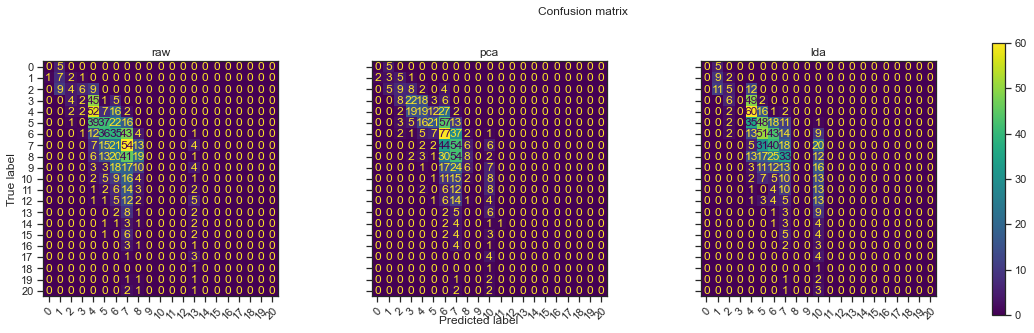

In [47]:
cm=confusion_matrix(Y_test, Y_pred)
cm_pca=confusion_matrix(Y_test_pca, Y_pred_pca)
cm_lda=confusion_matrix(Y_test_lda, Y_pred_lda)
cm_dict = {
    "raw": cm,
    "pca": cm_pca,
    "lda": cm_lda
}

f, axes = plt.subplots(1, 3, figsize=(20, 5), sharey='row')
for i,(c,cm) in enumerate(cm_dict.items()):
    #print(i,cm)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(c)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)

f.suptitle('Confusion matrix', fontsize=12)
f.colorbar(disp.im_, ax=axes)
plt.show()


#### Accuracy vs Max_depth

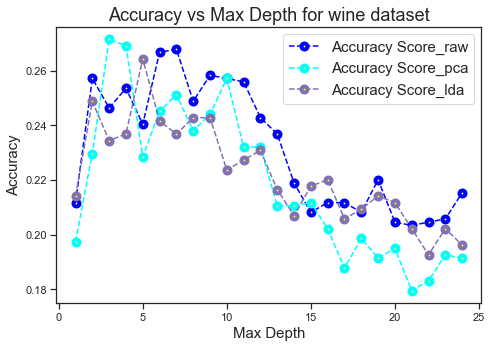

In [48]:
def plot_acc_vs_depth(dataset):
    max_depth_range = list(range(1, 25))
    acc_list = []
    acc_list_pca = []
    acc_list_lda = []
    for depth in max_depth_range:
        dtc_w = DecisionTreeClassifier(max_depth = depth)
        if dataset[0] == 'raw':
            dtc_w.fit(X_train, Y_train)
            score = dtc_w.score(X_test, Y_test)
            acc_list.append(score)
        if dataset[1] == 'pca':
            dtc_w.fit(X_train_pca, Y_train_pca)
            score = dtc_w.score(X_test_pca, Y_test_pca)
            acc_list_pca.append(score)
        if dataset[2] == 'lda':
            dtc_w.fit(X_train_lda, Y_train_lda)
            score =dtc_w.score(X_test_lda, Y_test_lda)
            acc_list_lda.append(score)

    return(acc_list,acc_list_pca,acc_list_lda)
  
acc_list,acc_list_pca,acc_list_lda = plot_acc_vs_depth(['raw','pca','lda'])
fig = plt.figure(figsize=(7,5))
plt.plot(range(1,25),acc_list, color = 'blue',marker ='o',mew =4,mfc='yellow',ls ='--' ,linewidth=1.5,label='Accuracy Score_raw')
plt.plot(range(1,25),acc_list_pca, color = 'cyan',marker ='o',mew =4,mfc='yellow',ls ='--' ,linewidth=1.5,label='Accuracy Score_pca')
plt.plot(range(1,25),acc_list_lda, color = 'm',marker ='o',mew =4,mfc='yellow',ls ='--' ,linewidth=1.5,label='Accuracy Score_lda')
plt.ylabel('Accuracy',fontsize = 15)
plt.xlabel('Max Depth',fontsize = 15)
plt.title('Accuracy vs Max Depth for wine dataset',fontsize = 18)
plt.legend(loc='best',fontsize = 15)
plt.tight_layout()
plt.show()

#### Splitting rules used for the trees

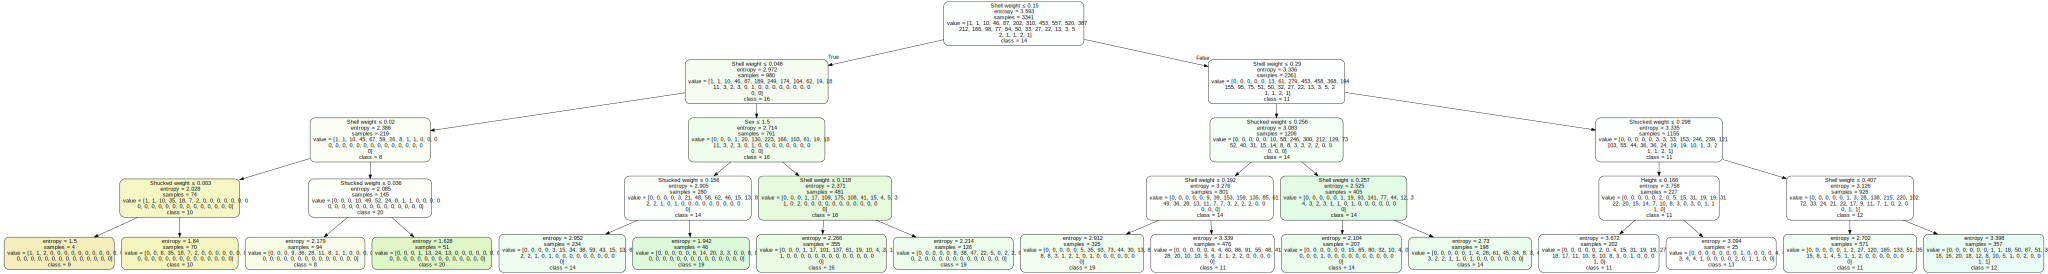

In [49]:
dtc_g = DecisionTreeClassifier(criterion= 'entropy', max_depth=4, min_samples_leaf= 2, min_samples_split=2)
dtc_g.fit(X_train,Y_train)
fn=X_train.columns
cn = abalone_raw.Rings.unique().astype(str)
dot_data = tree.export_graphviz(dtc_g, filled=True,feature_names=fn,class_names=cn ,rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [60]:
from sklearn.tree import export_text
dtc_g = DecisionTreeClassifier(criterion= 'entropy', max_depth=4, min_samples_leaf= 2, min_samples_split=2)
dt_rules = dtc_g.fit(X_train,Y_train)
fn_t=X_train.columns
#print(type(fn_t.tolist()))
tree_rules = export_text(dt_rules,feature_names = fn_t.tolist())
print(tree_rules)

|--- Shell weight <= 0.15
|   |--- Shell weight <= 0.05
|   |   |--- Shell weight <= 0.02
|   |   |   |--- Shucked weight <= 0.00
|   |   |   |   |--- class: 3
|   |   |   |--- Shucked weight >  0.00
|   |   |   |   |--- class: 4
|   |   |--- Shell weight >  0.02
|   |   |   |--- Shucked weight <= 0.04
|   |   |   |   |--- class: 5
|   |   |   |--- Shucked weight >  0.04
|   |   |   |   |--- class: 6
|   |--- Shell weight >  0.05
|   |   |--- Sex <= 1.50
|   |   |   |--- Shucked weight <= 0.16
|   |   |   |   |--- class: 9
|   |   |   |--- Shucked weight >  0.16
|   |   |   |   |--- class: 8
|   |   |--- Sex >  1.50
|   |   |   |--- Shell weight <= 0.12
|   |   |   |   |--- class: 7
|   |   |   |--- Shell weight >  0.12
|   |   |   |   |--- class: 8
|--- Shell weight >  0.15
|   |--- Shell weight <= 0.29
|   |   |--- Shucked weight <= 0.26
|   |   |   |--- Shell weight <= 0.19
|   |   |   |   |--- class: 8
|   |   |   |--- Shell weight >  0.19
|   |   |   |   |--- class: 10
|   |   |--

#### Comments

- As observed in Assignment-1, weight columns were positively correlated with many other columns(namely; Height,Length, Diameter ) and hence it is chosen as the root node for the split.Weight and Sex are the major contributors to splitting rules indicating that these are more important for classication.

##### Splitting rules used for the trees but fitted on page

[Text(930.0, 1630.8, 'Shell weight <= 0.15\nentropy = 3.593\nsamples = 3341\nvalue = [1, 1, 10, 46, 87, 202, 310, 453, 557, 520, 387\n212, 166, 98, 77, 54, 50, 33, 27, 22, 13, 3, 5\n2, 1, 1, 2, 1]\nclass = 14'),
 Text(465.0, 1268.4, 'Shell weight <= 0.046\nentropy = 2.972\nsamples = 980\nvalue = [1, 1, 10, 46, 87, 189, 249, 174, 104, 62, 19, 18\n11, 3, 2, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0]\nclass = 16'),
 Text(232.5, 906.0, 'Shell weight <= 0.02\nentropy = 2.386\nsamples = 219\nvalue = [1, 1, 10, 45, 67, 59, 26, 8, 1, 1, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0]\nclass = 8'),
 Text(116.25, 543.6000000000001, 'Diameter <= 0.08\nentropy = 2.028\nsamples = 74\nvalue = [1, 1, 10, 35, 18, 7, 2, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]\nclass = 10'),
 Text(58.125, 181.20000000000005, 'entropy = 1.5\nsamples = 4\nvalue = [1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]\nclass = 9'),
 Text(174.375, 181.20000000000005, 'e

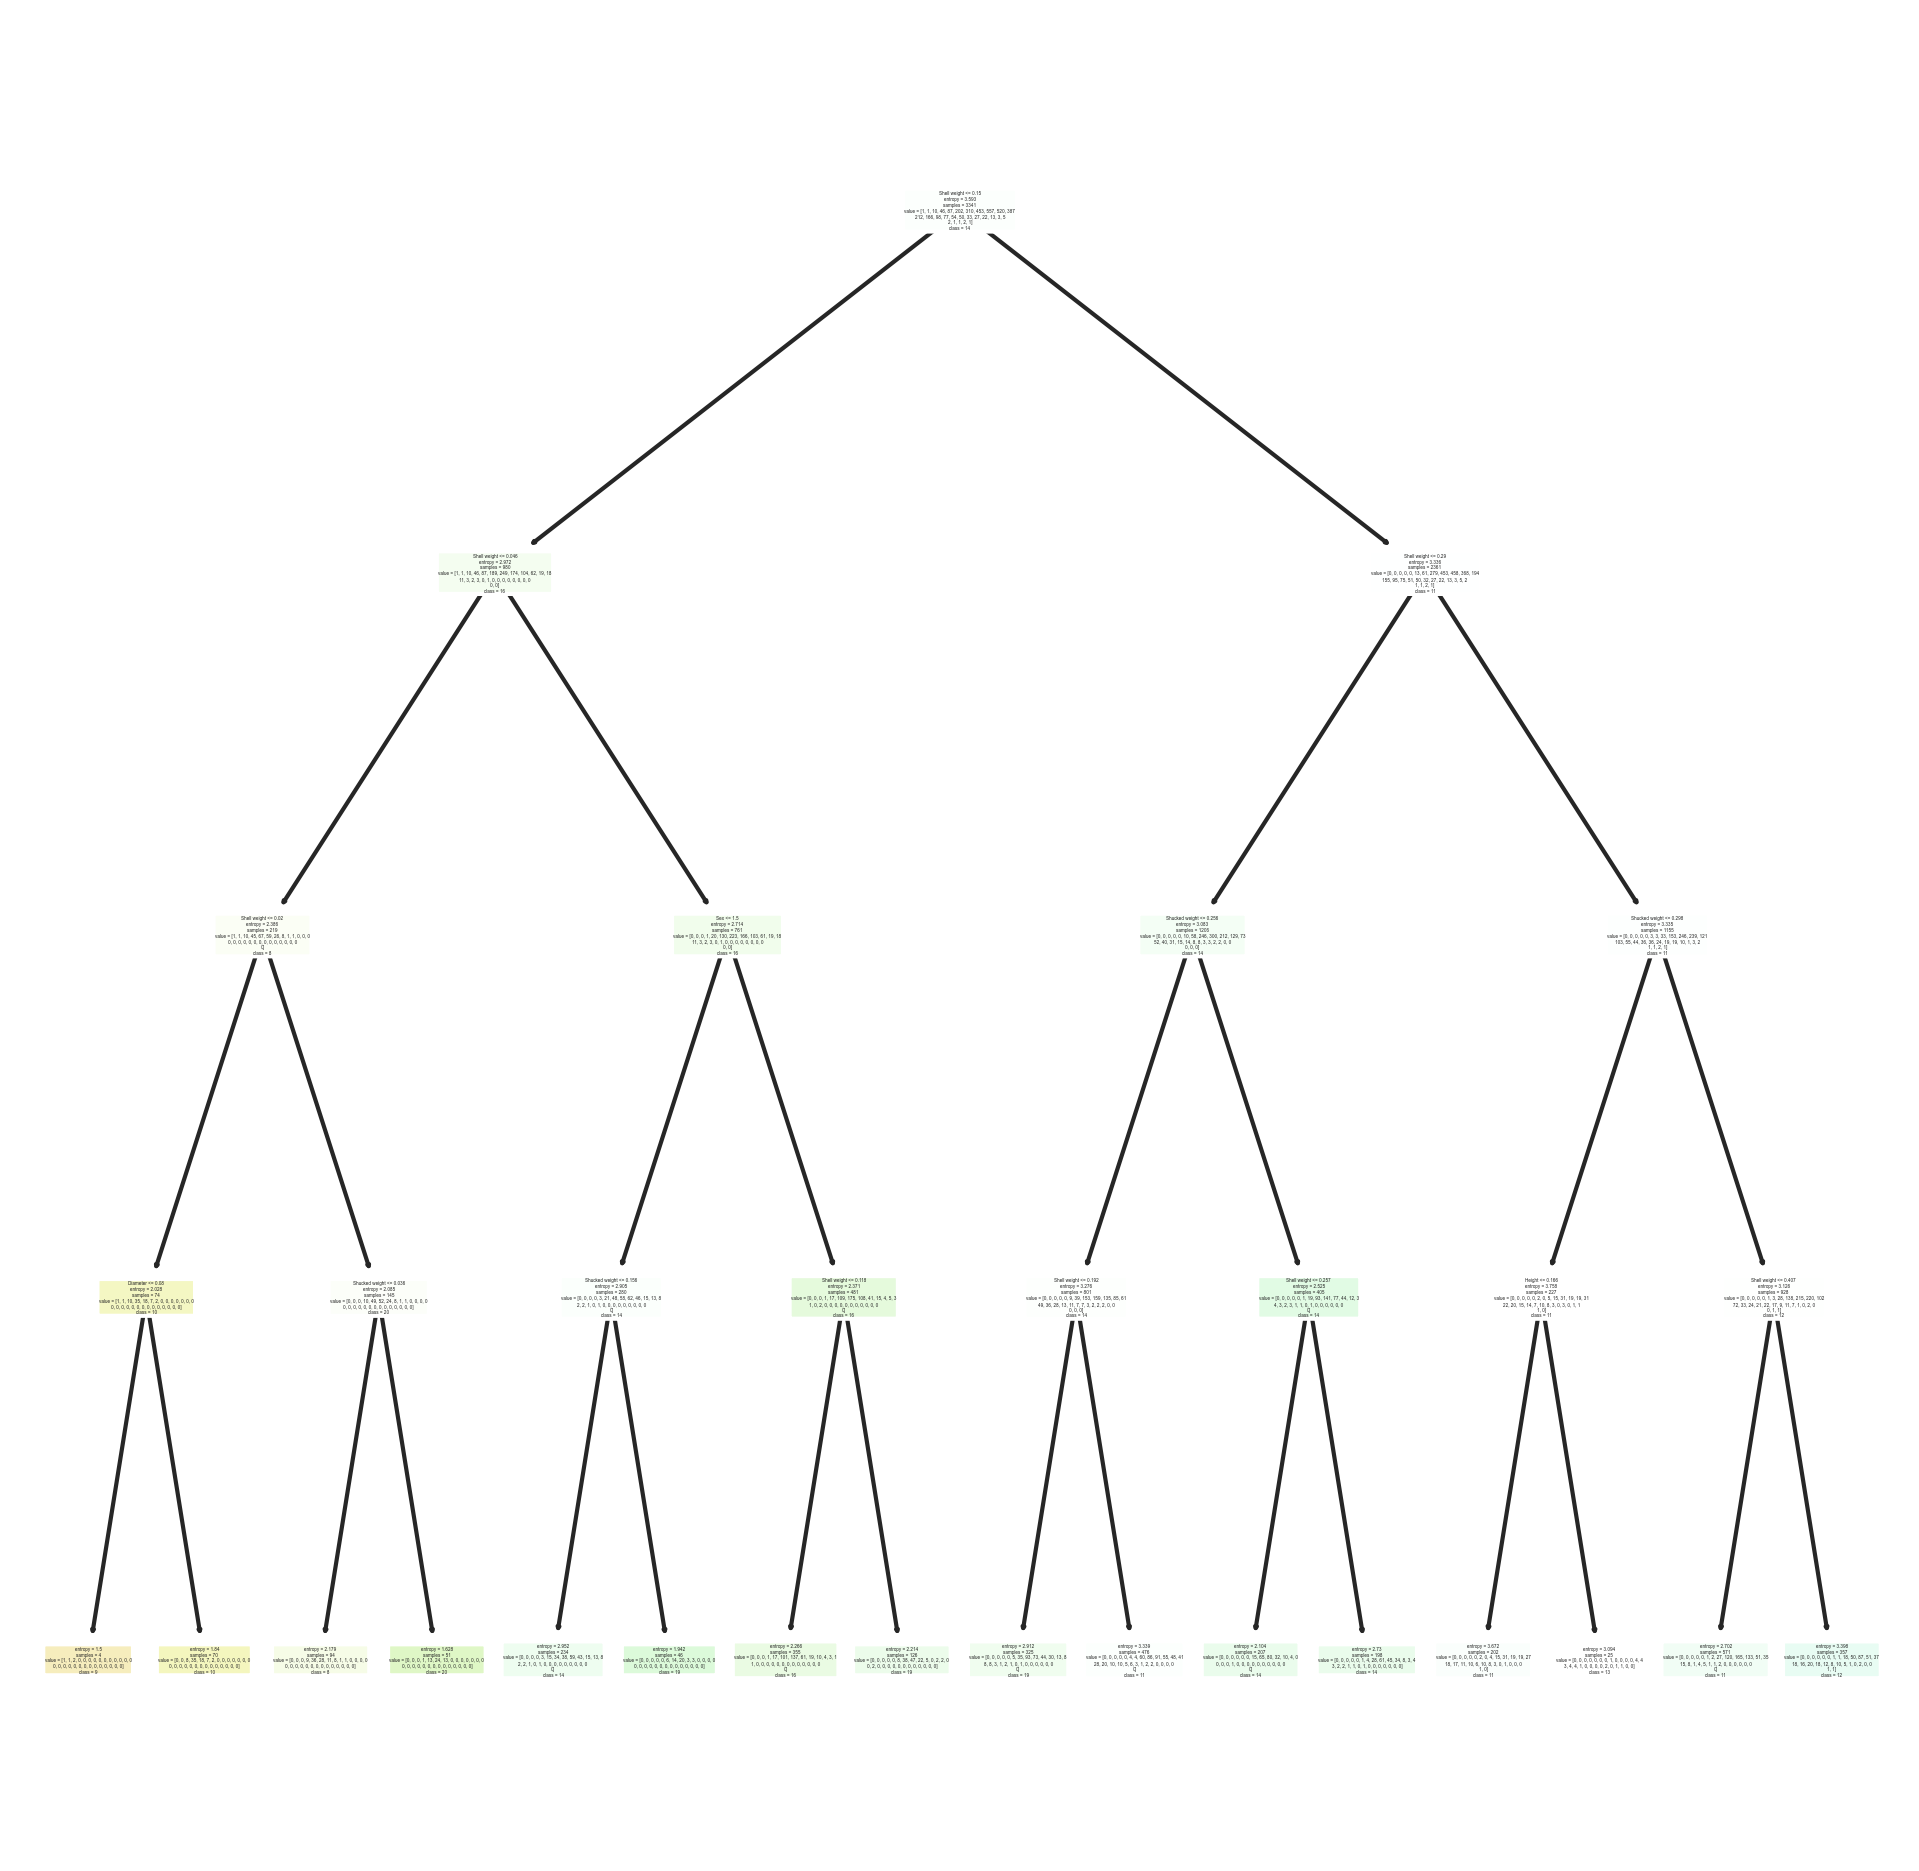

In [51]:
dtc_g = DecisionTreeClassifier(criterion= 'entropy', max_depth=4, min_samples_leaf= 2, min_samples_split=5)
dtc_g.fit(X_train,Y_train)
fn=X_train.columns
cn = abalone_raw.Rings.unique().astype(str)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,8), dpi=300)
tree.plot_tree(dtc_g, filled=True,feature_names=fn,class_names=cn ,rounded=True)
#fig.savefig('dtc_tree_plot_3.png')

### Random Forest Classifier

#### 5-Fold CV and hyperpararmeter tuning

In [52]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
Y_pred = rfc.predict(X_test)
cm=confusion_matrix(Y_test, Y_pred)
#print(confusion_matrix(Y_test, Y_pred))
#print(classification_report(Y_test, Y_pred))
print("Accuracy Score for Forest classifier without hyper parameter tuning is: ",accuracy_score(Y_test, Y_pred))
#disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dtc.classes_)
#disp.plot()

grid_params = {
    'n_estimators': [2,5,200, 500],
    'criterion' : ['entropy'],
    'max_depth' : range(2,25,1),
    #'max_features': range(3,10,1),
    #'min_samples_split' : range(2, 10, 1),
    #'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(rfc, grid_params, cv = 5, n_jobs = -1, verbose = True)
#print(grid_search.get_params().keys())
grid_search.fit(X_train, Y_train)
rfc = grid_search.best_estimator_
Y_pred = rfc.predict(X_test) 
print("Accuracy Score is :",accuracy_score(Y_test, Y_pred))
rf_raw_acc=accuracy_score(Y_test, Y_pred)
# best parameters and best score
print("Best Parameters are : ",grid_search.best_params_)
rf_raw_set=grid_search.best_params_
#print("Best Score is : ",grid_search.best_score_)
ac_df=pd.DataFrame(grid_search.cv_results_['params'])
#Creating a data frame with hyperparameters and accuracy
ac_df["accuracy"]=grid_search.cv_results_['mean_test_score']

grid_search.fit(X_train_pca, Y_train_pca)
rfc_pca = grid_search.best_estimator_
Y_pred_pca = rfc_pca.predict(X_test_pca) 
print("Accuracy Score using PCA is :",accuracy_score(Y_test_pca, Y_pred_pca))
rf_pca_acc=accuracy_score(Y_test_pca, Y_pred_pca)
# best parameters and best score
print("Best Parameters using PCA are : ",grid_search.best_params_)
rf_pca_set=grid_search.best_params_
#print("Best Score using PCA is : ",grid_search.best_score_)
ac_df_pca=pd.DataFrame(grid_search.cv_results_['params'])
#Creating a data frame with hyperparameters and accuracy
ac_df_pca["accuracy"]=grid_search.cv_results_['mean_test_score']

grid_search.fit(X_train_lda, Y_train_lda)
rfc_lda = grid_search.best_estimator_
Y_pred_lda = rfc_lda.predict(X_test_lda) 
print("Accuracy Score using LDA is :",accuracy_score(Y_test_lda, Y_pred_lda))
rf_lda_acc=accuracy_score(Y_test_lda, Y_pred_lda)
# best parameters and best score
print("Best Parameters using LDA are : ",grid_search.best_params_)
#print("Best Score using LDA is : ",grid_search.best_score_)
rf_lda_set=grid_search.best_params_
ac_df_lda=pd.DataFrame(grid_search.cv_results_['params'])
#Creating a data frame with hyperparameters and accuracy
ac_df_lda["accuracy"]=grid_search.cv_results_['mean_test_score']

Accuracy Score for Forest classifier without hyper parameter tuning is:  0.24641148325358853
Fitting 5 folds for each of 92 candidates, totalling 460 fits
Accuracy Score is : 0.27392344497607657
Best Parameters are :  {'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 5}
Fitting 5 folds for each of 92 candidates, totalling 460 fits
Accuracy Score using PCA is : 0.2679425837320574
Best Parameters using PCA are :  {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 200}
Fitting 5 folds for each of 92 candidates, totalling 460 fits
Accuracy Score using LDA is : 0.2727272727272727
Best Parameters using LDA are :  {'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 500}


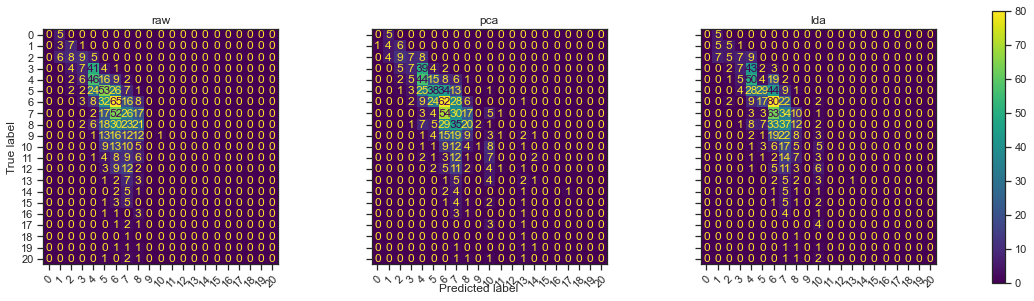

In [53]:
cm=confusion_matrix(Y_test, Y_pred)
cm_pca=confusion_matrix(Y_test_pca, Y_pred_pca)
cm_lda=confusion_matrix(Y_test_lda, Y_pred_lda)
cm_dict = {
    "raw": cm,
    "pca": cm_pca,
    "lda": cm_lda
}

f, axes = plt.subplots(1, 3, figsize=(20, 5), sharey='row')
for i,(c,cm) in enumerate(cm_dict.items()):
    #print(i,cm)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(c)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)


f.colorbar(disp.im_, ax=axes)
plt.show()


#### Heatmap of max_depth vs n_estimators

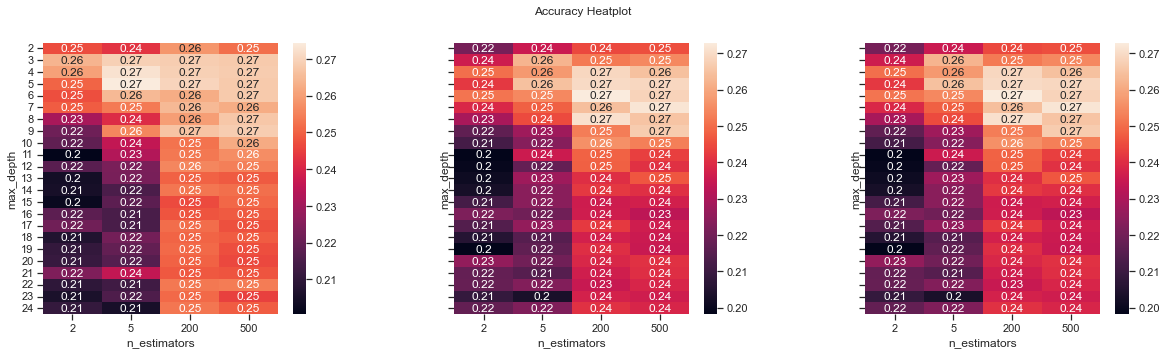

In [54]:
#Pivoting the dataframe for plotting heat map
ac_df=ac_df.pivot(index='max_depth',columns='n_estimators',values='accuracy')
ac_df_pca=ac_df_pca.pivot(index='max_depth',columns='n_estimators',values='accuracy')
ac_df_lda=ac_df_lda.pivot(index='max_depth',columns='n_estimators',values='accuracy')
#Plotting the graph
fig, ax =plt.subplots(1,3,figsize=(20, 5), sharey='row')

sns.heatmap(ac_df,annot=True, ax=ax[0])
sns.heatmap(ac_df_pca,annot=True ,ax=ax[1])
sns.heatmap(ac_df_pca,annot=True ,ax=ax[2])

plt.subplots_adjust(wspace=0.40, hspace=0.1)
fig.suptitle('Accuracy Heatplot', fontsize=12)
plt.show()

### Gradient Boosting Classifier

#### 5-Fold CV and hyperparameter tuning

In [55]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, Y_train)
Y_pred = gbc.predict(X_test)
cm=confusion_matrix(Y_test, Y_pred)
#print(confusion_matrix(Y_test, Y_pred))
#print(classification_report(Y_test, Y_pred))
print("Accuracy Score for Gradient Boosting classifier without hyper parameter tuning is: ",accuracy_score(Y_test, Y_pred))
#disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dtc.classes_)
#disp.plot()

grid_params = {
    'n_estimators': [2,120,200,500,800],
    'learning_rate' : [0.01, 0.1,1],
    #'criterion' : [None,'mse','mae'],
    #'max_depth' : range(2,22,2),
    #'max_features': range(3,10,1),
    #'min_samples_split' : range(2, 10, 1),
    #'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(gbc, grid_params, cv = 5, n_jobs = -1, verbose = True)
#print(grid_search.get_params().keys())
grid_search.fit(X_train, Y_train)
gbc = grid_search.best_estimator_
Y_pred = gbc.predict(X_test) 
print("Accuracy Score is :",accuracy_score(Y_test, Y_pred))
gbc_acc=accuracy_score(Y_test, Y_pred)
# best parameters and best score
print("Best Parameters are : ",grid_search.best_params_)
gbc_set=grid_search.best_params_
#print("Best Score using PCA is : ",grid_search.best_score_)
gbc_ac_df=pd.DataFrame(grid_search.cv_results_['params'])
#Creating a data frame with hyperparameters and accuracy
gbc_ac_df["accuracy"]=grid_search.cv_results_['mean_test_score']



grid_search.fit(X_train_pca, Y_train_pca)
gbc = grid_search.best_estimator_
Y_pred_pca = gbc.predict(X_test_pca) 
print("Accuracy Score is :",accuracy_score(Y_test_pca, Y_pred_pca))
gbc_pca_acc=accuracy_score(Y_test_pca, Y_pred_pca)
# best parameters and best score
print("Best Parameters are : ",grid_search.best_params_)
gbc_pca_set=grid_search.best_params_
#print("Best Score using PCA is : ",grid_search.best_score_)
gbc_ac_df_pca=pd.DataFrame(grid_search.cv_results_['params'])
#Creating a data frame with hyperparameters and accuracy
gbc_ac_df_pca["accuracy"]=grid_search.cv_results_['mean_test_score']


grid_search.fit(X_train_lda, Y_train_lda)
gbc = grid_search.best_estimator_
Y_pred_lda = gbc.predict(X_test_lda) 
print("Accuracy Score is :",accuracy_score(Y_test_lda, Y_pred_lda))
gbc_lda_acc=accuracy_score(Y_test_lda, Y_pred_lda)
# best parameters and best score
print("Best Parameters are : ",grid_search.best_params_)
gbc_lda_set=grid_search.best_params_
#print("Best Score using PCA is : ",grid_search.best_score_)
gbc_ac_df_lda=pd.DataFrame(grid_search.cv_results_['params'])
#Creating a data frame with hyperparameters and accuracy
gbc_ac_df_lda["accuracy"]=grid_search.cv_results_['mean_test_score']

Accuracy Score for Gradient Boosting classifier without hyper parameter tuning is:  0.2535885167464115
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Accuracy Score is : 0.26913875598086123
Best Parameters are :  {'learning_rate': 0.01, 'n_estimators': 120}
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Accuracy Score is : 0.26435406698564595
Best Parameters are :  {'learning_rate': 0.01, 'n_estimators': 200}
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Accuracy Score is : 0.28708133971291866
Best Parameters are :  {'learning_rate': 0.01, 'n_estimators': 120}


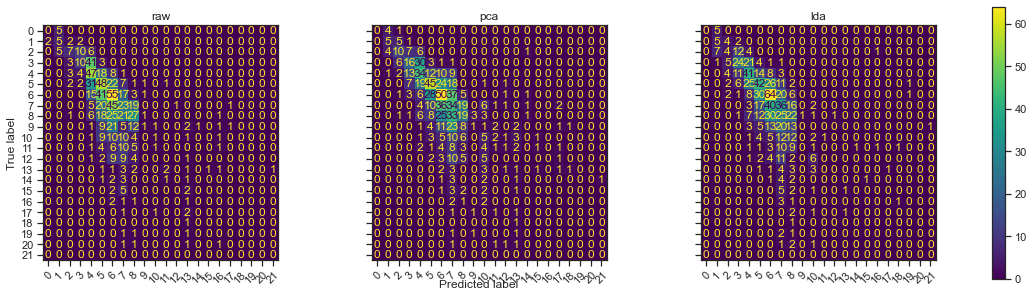

In [56]:
cm=confusion_matrix(Y_test, Y_pred)
cm_pca=confusion_matrix(Y_test_pca, Y_pred_pca)
cm_lda=confusion_matrix(Y_test_lda, Y_pred_lda)
cm_dict = {
    "raw": cm,
    "pca": cm_pca,
    "lda": cm_lda
}

f, axes = plt.subplots(1, 3, figsize=(20, 5), sharey='row')
for i,(c,cm) in enumerate(cm_dict.items()):
    #print(i,cm)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(c)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)


f.colorbar(disp.im_, ax=axes)
plt.show()


#### Heatplot of learning_rate and n_estimators

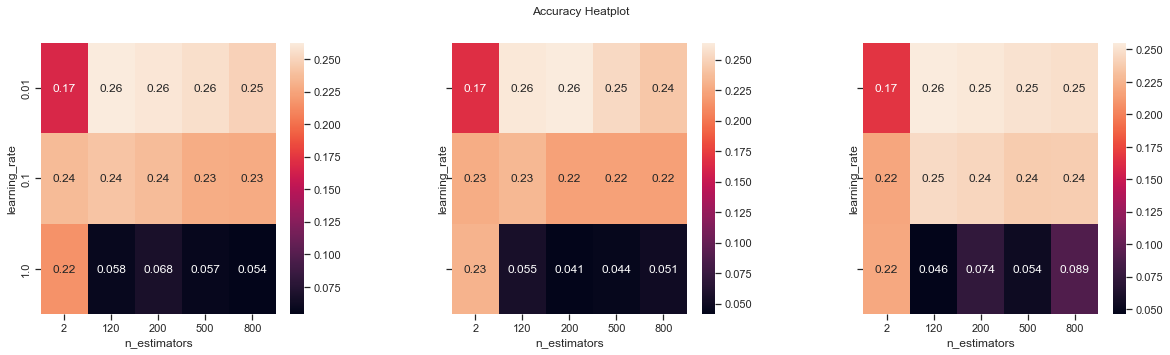

In [57]:
#Pivoting the dataframe for plotting heat map
gbc_ac_df=gbc_ac_df.pivot(index='learning_rate',columns='n_estimators',values='accuracy')
gbc_ac_df_pca=gbc_ac_df_pca.pivot(index='learning_rate',columns='n_estimators',values='accuracy')
gbc_ac_df_lda=gbc_ac_df_lda.pivot(index='learning_rate',columns='n_estimators',values='accuracy')
#Plotting the graph
fig, ax =plt.subplots(1,3,figsize=(20, 5), sharey='row')

sns.heatmap(gbc_ac_df,annot=True, ax=ax[0])
sns.heatmap(gbc_ac_df_pca,annot=True ,ax=ax[1])
sns.heatmap(gbc_ac_df_lda,annot=True ,ax=ax[2])

plt.subplots_adjust(wspace=0.40, hspace=0.1)
fig.suptitle('Accuracy Heatplot', fontsize=12)
plt.show()

### Final Results

In [66]:
dt_dict = {'Algo': ['Decision Tree','Random Forest','Gradient Boosting'], 
           'abalone_raw': [dt_raw_acc,rf_raw_acc,gbc_acc], 'abalone_pca': [dt_pca_acc,rf_pca_acc,gbc_pca_acc],
           'abalone_lda':[dt_lda_acc,rf_lda_acc,gbc_lda_acc]}

df_mid=pd.DataFrame(data=dt_dict,columns=['Algo','abalone_raw','abalone_pca','abalone_lda'])
#display(df_mid)
df_nb=df_merged.reset_index()
final_df = df_nb.append(df_mid, ignore_index=True)
display(final_df)

,Algo,abalone_raw,abalone_pca,abalone_lda
0,KNeighborsClassifier,0.250907,0.249947,0.253777
1,GaussianNB,0.230326,0.232716,0.251631
2,MultinomialNB,0.206377,0.165673,0.164955
3,ComplementNB,0.170705,0.171898,0.228406
4,Decision Tree,0.253589,0.264354,0.234450
5,Random Forest,0.273923,0.267943,0.272727
6,Gradient Boosting,0.269139,0.264354,0.287081


In [67]:
#print(dt_raw_set.keys())
#print(dt_raw_set.values(),dt_pca_set.values(),dt_lda_set.values())
dt_s =[dt_raw_set,dt_pca_set,dt_lda_set]
df_dt_settings = pd.DataFrame(dt_s)
df_dt_settings['Algo']= 'Decision Tree'
df_dt_settings['Data'] = ['raw','pca','lda']
display(df_dt_settings)

,max_depth,min_samples_leaf,min_samples_split,Algo,Data
0,4,2,2,Decision Tree,raw
1,4,4,2,Decision Tree,pca
2,3,2,2,Decision Tree,lda


In [68]:
rf_s =[rf_raw_set,rf_pca_set,rf_lda_set]
df_rf_settings = pd.DataFrame(rf_s)
df_rf_settings['Algo']= 'Random Forest'
df_rf_settings['Data'] = ['raw','pca','lda']
display(df_rf_settings)

,criterion,max_depth,n_estimators,Algo,Data
0,entropy,5,5,Random Forest,raw
1,entropy,6,200,Random Forest,pca
2,entropy,4,500,Random Forest,lda


In [69]:
gbc_s =[gbc_set,gbc_pca_set,gbc_lda_set]
df_gbc_settings = pd.DataFrame(gbc_s)
df_gbc_settings['Algo']= 'Gradient Boosting'
df_gbc_settings['Data'] = ['raw','pca','lda']
display(df_gbc_settings)

,learning_rate,n_estimators,Algo,Data
0,0.01,120,Gradient Boosting,raw
1,0.01,200,Gradient Boosting,pca
2,0.01,120,Gradient Boosting,lda


In [2]:
knn_setting = ({'n_neighbors':66 , 'metric': 'minkowski' , 'weights': "uniform",'p':2})
gnb_settings = ("default")
mnb_settings = ("default")
cnb_settings = ("default")
dt_settings = ({'criterion':'Entropy','max_depth':4,'min_samples_leaf':4,'min_samples_split':2})
rf_settings = ({'criterion':'Entropy','max_depth':5,'n_estimators':500})
gb_settings = ({'learning_rate':0.01,'n_estimators':120})

settings_all =[knn_setting,gnb_settings,mnb_settings,cnb_settings,dt_settings,dt_settings,rf_settings,gb_settings]
settings_all
df_final['settings'] =settings_all

In [5]:
display(df_final)

,Algo,settings,abalone_raw,abalone_pca,abalone_lda
0,KNeighborsClassifier,"{'n_neighbors':66 , 'metric': 'minkowski' , 'w...",0.250907,0.249947,0.253777
1,GaussianNB,default,0.230326,0.232716,0.251631
2,MultinomialNB,default,0.206377,0.165673,0.164955
3,ComplementNB,default,0.170705,0.171898,0.228406
4,Decision Tree,"{'criterion':'Entropy','max_depth':4,'min_samp...",0.253589,0.264354,0.234450
5,Random Forest,"{'criterion':'Entropy','max_depth':5,'n_estima...",0.273923,0.267943,0.272727
6,Gradient Boosting,"{'learning_rate':0.01,'n_estimators':120}",0.269139,0.264354,0.287081


#### Comments

- Gradient Boosting performed best with the pipeline (abalone -> scaling -> lda -> scaling -> Gradient Boosting Classifier)
- Dimensionality Reduction helped in Decision tree, Random Forest and Gradient Boosting algorithms, while PCA gav econsistent accuracies with mentioned algorithms, LDA performed well only with Gradient Boosting and Random Forest algorithms.
- Decision tree and Random Forest gave better accuracy with lesser max depth as compared to wine dataset.
- With reduced dimensions, we observed better accuracy overall and this could be attributed to :
    - for Decision Tree, random Forest and ensemble method (Gradient boosting) PCA transforms the data linearly in directions with highest variance and these are the directions with highest Information gain.
    - Because variables have low correlation and high variance in reduced dimensions
    - There are outliers in the data which increases the distance (intra class spread in case of LDA), that may hamper the accuracy
    - For this muticlass classification task, accuracy may not be the best performance evaluation metric for Complement and multinomial Naive Bayes

### References

[1] P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

[2] Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

[3] Compare the effect of different scalers on data with outliers — scikit-learn 0.22.1 documentation. (n.d.). Retrieved January, 2022, from https://scikitlearn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py contributed by Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.

[4] Discussed KNeighbor Classifiers  — scikit-learn 0.22.1 documentation. (n.d.). Retrieved January 27, 2022, from https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html contributed by Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.

[5] Discussed Normalization techniques and parmeters  — scikit-learn 0.22.1 documentation. (n.d.). Retrieved January 27, 2022, from https://scikit-learn.org/stable/modules/preprocessing.html#normalization contributed by Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.

[6] Discussed different distance metrics  — scikit-learn 0.22.1 documentation. (n.d.). Retrieved January 27, 2022, from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.DistanceMetric.html#sklearn.metrics.DistanceMetric

[7] Discussed axes, plotting and figures in python  — matplotlib.org documentation. (n.d.). Retrieved January 27, 2022, from https://matplotlib.org/stable/api/legend_api.html?highlight=legends conributed by
J. D. Hunter, "Matplotlib: A 2D Graphics Environment", Computing in Science & Engineering, vol. 9, no. 3, pp. 90-95, 2007.

[8] Discussed plotting of dataframe columns inpython  — pandas.org documentation. (n.d.). Retrieved January 27, 2022, from https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html
contributed by McKinney, W., & others. (2010). Data structures for statistical computing in python. In Proceedings of the 9th Python in Science Conference (Vol. 445, pp. 51–56).

[9] Singh, S. (2022). Analysis-pca-red-wine-quality-prediction-87%. Retrieved from https://www.kaggle.com/sonalisingh1411/analysis-pca-red-wine-quality-prediction-87

[10] Brownlee, J. (2019). Ordinal and One-Hot Encodings for Categorical Data. Retieved from https://machinelearningmastery.com/

[10] Katara, V. (2020). Dimensionality Reduction — PCA vs LDA vs t-SNE. Retieved from https://medium.com/analytics-vidhya/dimensionality-reduction-pca-vs-lda-vs-t-sne-681636bc686

[11] Kolassa, S. (2020). Setting-max-depth-greater-than-the-number-of-features-in-a-randomforest. Retieved from https://stats.stackexchange.com/questions/336382/setting-max-depth-greater-than-the-number-of-features-in-a-randomforest#:~:text=There%20is%20no%20problem%20with,two%20features%2C%20Age%20and%20Sex%20.

In [1]:
import json
import os



# generate list of files to be merged
notebooks_to_merge = [file for file in os.listdir(os.getcwd()) if file.endswith('.ipynb')]

# list should be in the order in which you want the notebooks to be merged
# my notebooks are labeled 1.ipynb, 2.ipynb... in the order I want
print(notebooks_to_merge.sort())

print(notebooks_to_merge)

def combine_ipynb_files(list_of_notebooks, combined_file_name):
    
    
    
    with open (notebooks_to_merge[0], mode = 'r', encoding = 'utf-8') as f:
        a = json.load (f)
    
    for notebook in notebooks_to_merge[1:]:
        with open (notebook, mode = 'r', encoding = 'utf-8') as f:
            b = json.load(f)
            a['cells'].extend (b['cells']) 
                # extend here, not append, so that each dictionary in b['cells']
                # is added to new dictionary in a['cells']

    with open(combined_file_name, mode='w', encoding='utf-8') as f:
        json.dump(a, f)
    
    print('Generated file: "{}".'.format(combined_file_name))
    
    return (os.path.realpath(combined_file_name))

combine_ipynb_files(notebooks_to_merge, "combined.ipynb")

None
['1.A2_wine.ipynb', '2.A2_abalone.ipynb']
Generated file: "combined.ipynb".


'C:\\Users\\hp\\Desktop\\Winter_22\\KMDK\\Assignment_2\\Submission\\combined.ipynb'